# IMPORTANT:

To run the notebook active the correct environment first:
Execute in a terminal:

1:

***conda activate mpfr_env***

2:

***export JUPYTER_PATH=/home/work/.conda/envs/mpfr_env/bin/python***



In [1]:
import sys
sys.version, sys.executable
# should be 3.8.2

('3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 08:20:52) \n[GCC 7.3.0]',
 '/home/work/.conda/envs/mpfr_env/bin/python')

In [2]:
import numpy as np
import pickle
import copy
import pandas as pd
from importlib import reload


import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib.image as mpimg
import matplotlib.lines as mlines

from sys import path
path.append('./../')
import src as pnp

# load results

In [3]:
df = pnp.load_parameter_overview()
df.loc[[61]]

found files:  ['results_test_run1.pcl', 'results_test_run0.pcl', 'results_test_run2.pcl', 'results_test_run6.pcl', 'results_test_run7.pcl', 'results_test_run5.pcl', 'results_test_run11.pcl', 'results_test_run10.pcl', 'results_test_run3.pcl']
open : /home/work/Projects/spineIonConcentrations/results/results_test_run1.pcl


,domain,membrane_potential,d_phi_in,d_phi_ext,d_phi_in_min,d_phi_in_max,d_phi_ext_min,d_phi_ext_max,r_in,r_mem,...,chem_f_pos_in,chem_f_pos_ext,chem_f_neg_in,chem_f_neg_ext,pnp_lhs_in,pnp_lhs_ext,pnp_rhs_in,pnp_rhs_ext,date,experiment_id
experiment_id,,,,,,,,,,,,,,,,,,,,,
61,neck,-0.07,-3.4047724598286703098346320590504953166466761...,-0.0261341618529541592358400592388534278143197...,-5.4610587453800957247196379285014700144529342...,-3.3742145545603147160917956171033438295125961...,-6.4553786219067893694444672874927518211485430...,-0.0263723869793248877693714327108409634092822...,2.000000e-08,2.500000e-08,...,-3.986940e+07,-14.731019,3.986942e+07,-3.986940e+07,0.0,0.0,0.0,0.0,2020-09-03 14:54:05.928709,61


found files:  ['results_test_run1.pcl', 'results_test_run0.pcl', 'results_test_run2.pcl', 'results_test_run6.pcl', 'results_test_run7.pcl', 'results_test_run5.pcl', 'results_test_run11.pcl', 'results_test_run10.pcl', 'results_test_run3.pcl']
open : /home/work/Projects/spineIonConcentrations/results/results_test_run1.pcl
[0.03, 0.3999999999999999, 0.5399999999999999, 0.5399999999999999]
(4256, 6384, 4)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; part

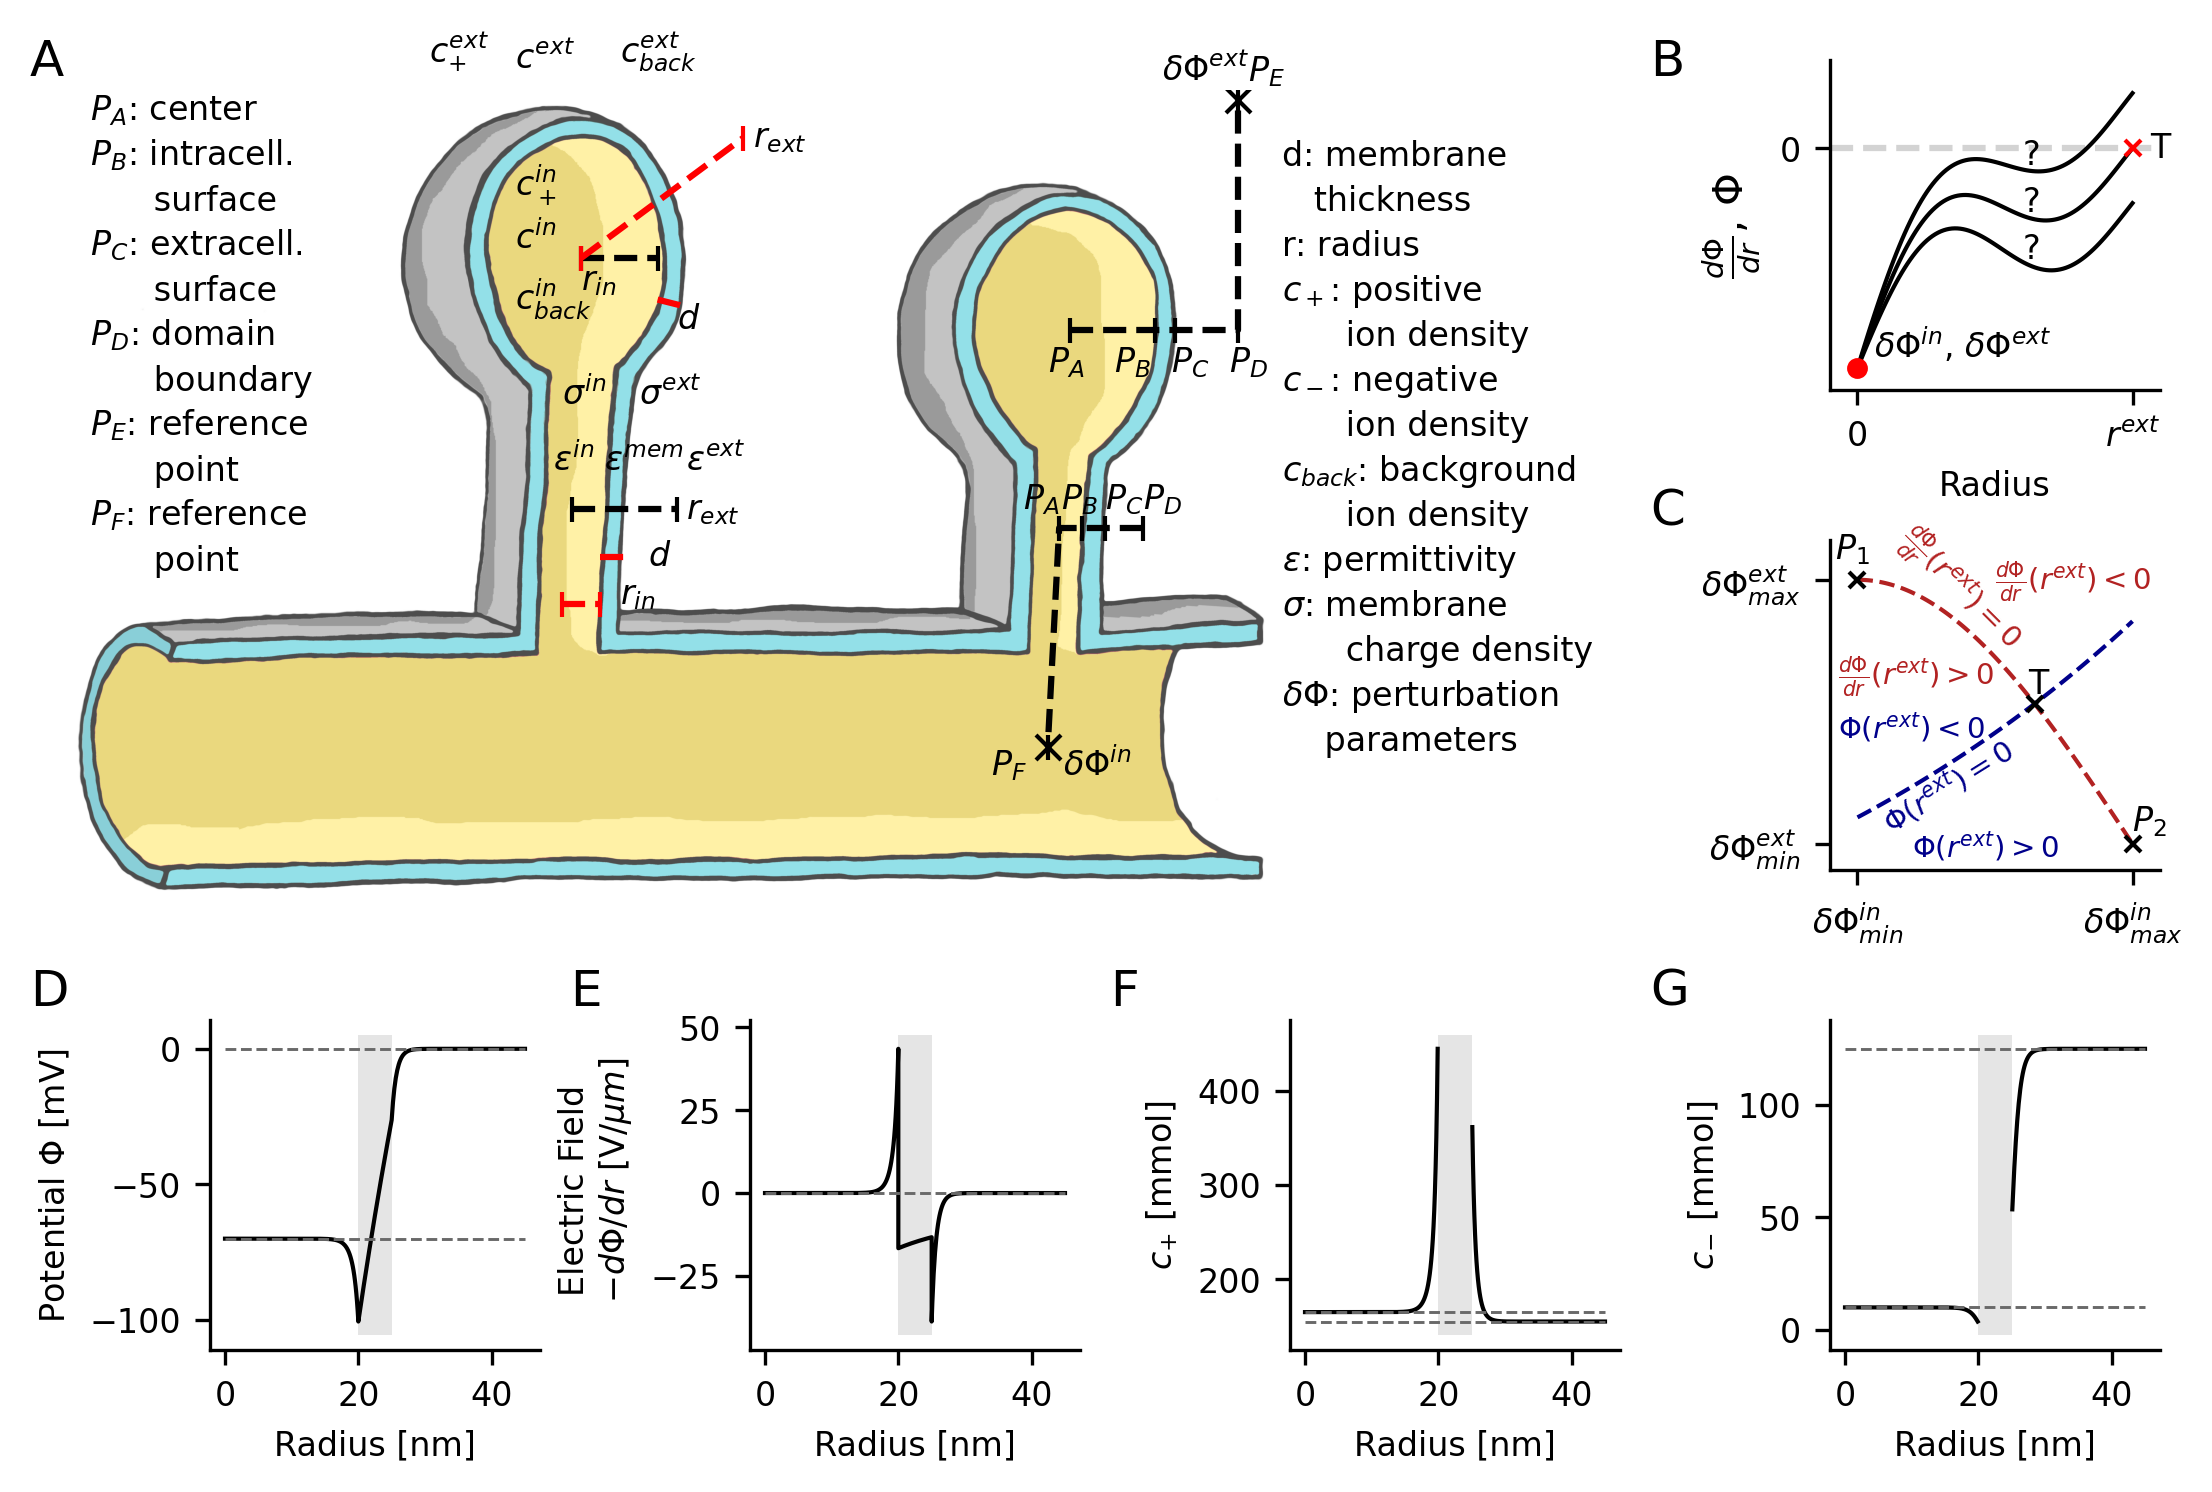

In [4]:

import numpy as np
import pickle
import copy
import pandas as pd
from importlib import reload


import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib.image as mpimg
import matplotlib.lines as mlines

from sys import path
path.append('./../')
import src as pnp

df = pnp.load_parameter_overview()

#####################
# shooding method figure

fig_width = 7.5  # inch
fig_height = 5.


margin_left = 0.7
margin_right = 0.3
margin_top = 0.2
margin_bottom = 0.5
margin_c = 0.7
margin_l = 0.5 

wx = (fig_width - margin_left - margin_right - 3. * margin_c) / 4. # absolute [inch]
wy = (fig_height - margin_bottom - margin_top - 2. * margin_l) / 3.

x1 = margin_left / fig_width
x2 = (margin_left + wx + margin_c) / fig_width
x3 = (margin_left + 2.*wx + +2.*margin_c) / fig_width
x4 = (margin_left + 3.*wx + +3.*margin_c) / fig_width

y1 = margin_bottom / fig_height
y2 = (margin_bottom + margin_l + wy) / fig_height
y3 = (margin_bottom + 2*margin_l + 2*wy) / fig_height



wy2 = 2*wy+margin_l
wx2 = wy2*6384./4256
x5 = (fig_width - wy - margin_c - wx2) / fig_width
x5=0.03
y4 = y2 - 0.02

wx = wx / fig_width # relative
wy = wy / fig_height
wx2 = wx2 / fig_width
wy2 = wy2 / fig_height


pos1 = [x1, y1, wx, wy]
pos2 = [x2, y1, wx, wy]
pos3 = [x3, y1, wx, wy]
pos4 = [x4, y1, wx, wy]
pos5 = [x5, y4, wx2, wy2]
#pos6 = [x2, y4, wx2, wy3]
pos7 = [x4, y2, wx, wy]
pos8 = [x4, y3, wx, wy]

print(pos5)

#######################

fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)

pnp.spine_comic(fig, pos5, make_legend=False)
pnp.fig_2d_shooting(fig, pos7)
pnp.fig_1d_shooting(fig, pos8)

domain_tmp = pnp.load_domain_from_df(df, 61)
pnp.plot_pnp_solution(fig, posA=pos1, posB=pos2, posC=pos3, posD=pos4, 
                      domain=domain_tmp, mask_extracellular_space=False)

x_leg1 = 0.04
y_leg1 = 0.62
dy_leg1 = 0.03
fig.text(x_leg1,y_leg1 + 10. * dy_leg1, '$P_A$: center', fontsize=8)
fig.text(x_leg1,y_leg1 + 9.0 * dy_leg1, '$P_B$: intracell.', fontsize=8)
fig.text(x_leg1,y_leg1 + 8.0 * dy_leg1, '      surface', fontsize=8)
fig.text(x_leg1,y_leg1 + 7.0 * dy_leg1, '$P_C$: extracell. ', fontsize=8)
fig.text(x_leg1,y_leg1 + 6.0 * dy_leg1, '      surface', fontsize=8)
fig.text(x_leg1,y_leg1 + 5.0 * dy_leg1, '$P_D$: domain', fontsize=8)
fig.text(x_leg1,y_leg1 + 4.0 * dy_leg1, '      boundary', fontsize=8)
fig.text(x_leg1,y_leg1 + 3.0 * dy_leg1, '$P_E$: reference', fontsize=8)
fig.text(x_leg1,y_leg1 + 2.0 * dy_leg1, '      point', fontsize=8)
fig.text(x_leg1,y_leg1 + 1.0 * dy_leg1, '$P_F$: reference', fontsize=8)
fig.text(x_leg1,y_leg1 + 0.0 * dy_leg1, '      point', fontsize=8)

x_leg2 = 0.57
y_leg2 = 0.5
dy_leg2 = 0.03

fig.text(x_leg2,y_leg2 + 13 * dy_leg2, 'd: membrane', fontsize=8)
fig.text(x_leg2,y_leg2 + 12 * dy_leg2, '   thickness', fontsize=8)
fig.text(x_leg2,y_leg2 + 11 * dy_leg2, 'r: radius', fontsize=8)
fig.text(x_leg2,y_leg2 + 10 * dy_leg2, '$c_+$: positive', fontsize=8)
fig.text(x_leg2,y_leg2 + 9  * dy_leg2, '      ion density', fontsize=8)
fig.text(x_leg2,y_leg2 + 8  * dy_leg2, '$c_-$: negative', fontsize=8)
fig.text(x_leg2,y_leg2 + 7  * dy_leg2, '      ion density', fontsize=8)
fig.text(x_leg2,y_leg2 + 6  * dy_leg2, '$c_{back}$: background', fontsize=8)
fig.text(x_leg2,y_leg2 + 5  * dy_leg2, '      ion density', fontsize=8)
fig.text(x_leg2,y_leg2 + 4  * dy_leg2, '$\epsilon$: permittivity', fontsize=8)
fig.text(x_leg2,y_leg2 + 3  * dy_leg2, '$\sigma$: membrane', fontsize=8)
fig.text(x_leg2,y_leg2 + 2  * dy_leg2, '      charge density', fontsize=8)
fig.text(x_leg2,y_leg2 + 1  * dy_leg2, '$\delta\Phi$: perturbation', fontsize=8)
fig.text(x_leg2,y_leg2 + 0  * dy_leg2, '    parameters', fontsize=8)

# ax.text(xLeg,yLeg + 17 * dyLeg, 'in: intracellular', fontsize=8)
# ax.text(xLeg,yLeg + 18 * dyLeg, 'ext: extracellular', fontsize=8)


##########

fig.text(x1-0.08, 0.95, 'A', fontsize=12)
fig.text(x4-0.08, 0.95, 'B', fontsize=12)
fig.text(x4-0.08, 0.65, 'C', fontsize=12)
fig.text(x1-0.08, 0.33, 'D', fontsize=12)
fig.text(x2-0.08, 0.33, 'E', fontsize=12)
fig.text(x3-0.08, 0.33, 'F', fontsize=12)
fig.text(x4-0.08, 0.33, 'G', fontsize=12)



########f
#ax_frame = fig.add_axes([0,0,1,1])
#ax_frame.set_xticks([])
#ax_frame.set_yticks([])
#ax_frame.set_facecolor('none')



plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure01.png')
plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure01.tif')
plt.savefig('./../../../../PaperSpineElectrodiffusion/figures/ion_concentrations/Figure01.eps')
plt.show()


#############################################
# Important remarks on Fig B
# 1.
# Phi < 0 means that the potential difference Phi(0) - Phi(r_ext) < V_mem
# Phi(0) is set to V_mem
# Phi(r_ext) deviates from zero, which is the desired value, if the initial conditions are not choosen correctely
# if Phi(r_ext) > 0 the the potetial difference is larger than V_mem 
# 2.
# The electric field is a measure for the cumulative charge
# From Gauss' law follows that when the cumulative charge is zero within r<=r_ext then dPhi/dr(r_ext)=E(r_ext)=0
# when there is an excess of positive charge the electric field is also positive and points outwards

# Fig S1 - Methods: Solution of PNP-equation

### Verify found solution
To verify if the found solution satisfies the stationary PNP-equations we compare LHS and RHS of equations from eqations (?) for polar and spherical symmetry.

In [ ]:
domain_tmp.compute_pnp()
pnp.plot_PNP_solution(domain_tmp)

# Fig S2 - Spacing of grid points
Near the boundary the spacing between the grid points has to be significantly smaller than the Debye-length. Therefor we define a function that maps linearly spaced grid points to a list of grid points with smaller spacing near the boundary.

f(r) = R * ln(r+1) / ln(R+1)

Remarks:

    f(0) = 0
    f(R) = R
    f''(r) < 0 for 0 < r < R 

In [ ]:
def transform_lin_to_log_spacing(r, scale=50.):
    """
    function definition of f(r)
    """
    R = np.max(r) - np.min(r)    
    r_norm = (r - np.min(r)) / R   
    log_points = R * np.log(scale *  r_norm+1.) / np.log(scale+1.)
    
    return log_points

def transform_lin_to_log_spacing_extracell(r, scale=50.):
    """
    function definition of f(r)
    """    
    R = np.max(r) - np.min(r)
    r_norm = 1. - (r - np.min(r)) / R   
    log_points = R - R * np.log(scale * r_norm +1.) / np.log(scale+1.)# + np.min(r)
    
    return log_points

def min_log_spacing(R, N, scale=50):
    """
    size of last interval
    """
    min_spacing = R - R * np.log(scale - scale/N + 1.) / np.log(scale + 1.)
    return min_spacing

def max_log_spacing(R, N, scale=50):
    """
    size of first interval
    """
    max_spacing = R * np.log(scale/N + 1.) / np.log(scale + 1.)
    return max_spacing

def min_resolution(R, res_min,scale=50.):
    """
    min number of grid points that have a last interval smaller than arg: res_min
    """
    s = scale
    a = (1-res_min/R)*np.log(scale+1.)
    N=1./(1.-(np.exp(a)-1)/s)
    N = np.ceil(N)
    return N

def ax_grid_points(fig, pos, spacing='lin'):
    ax = fig.add_axes(pos)
    
    lin_points =  np.linspace(0, 100, 26)
    if spacing == 'lin':
        x_points = lin_points
        ax.set_title('linear spacing', fontsize=8)
    elif spacing == 'log':
        ax.set_title('logarithmic spacing', fontsize=8)
        x_points = transform_lin_to_log_spacing(lin_points, scale=10)
    
    ax.set_xlim([0, 100])
    ax.set_xticks(x_points)
    labels = [''] * np.size(x_points)
    labels[0] = '0'
    labels[-1] = 'R'
    ax.set_xticklabels(labels)
    
    ax.set_ylim([-1,1])
    
    ax.set_yticks([])
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
def ax_map_lin_log(fig, pos):
    
    ax = fig.add_axes(pos)
    
    x = np.linspace(0,100,1000)
    xex = np.linspace(200,300,1000)
    y = transform_lin_to_log_spacing(x)
    yex = transform_lin_to_log_spacing_extracell(xex)
    ax.set_xlim([0,100])
    ax.set_ylim([0,100])
    
    ax.plot(x,y, 'k-', label='f(r) intracell.')
    ax.plot(x,yex, 'b-', label='f(r) extracell.')
    
    ax.plot(x*0+100,y, 'k--')
    ax.plot(x,y*0+100, 'k--')
    ax.plot(x,x, 'k--')
    
    ax.set_xticks([0,100])
    ax.set_xticklabels([0,'R'])
    ax.set_yticks([0,100])
    ax.set_yticklabels([0,'R'])
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    
    leg=ax.legend(fontsize=8, frameon=False)
    
    
def ax_min_max_res(fig, pos):
    ax = fig.add_axes(pos)
    
    x = np.array([10. * 2**n for n in range(8)])
    
    N_list = [20. * 2**(2*n) for n in range(4)]
    
    colors = ('darkslategrey', 'teal', 'darkturquoise', 'lightblue')
    
    for i,n in enumerate(N_list):
        y_min = min_log_spacing(x, n)
        ax.plot(x,y_min, label=str(int(n)), color=colors[i])
        
        y_max = max_log_spacing(x,n)
        ax.plot(x,y_max, ls='--', color=colors[i])
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlabel('Radius [nm]', fontsize=8)
    ax.set_ylabel('Grid Spacing [nm]', fontsize=8)
    
    leg=ax.legend(fontsize=8, frameon=False)
    
    ax.set_xticks([10, 100, 1000])
    ax.set_xticklabels([10, 100, 1000])
    
def ax_min_number_grid_points(fig, pos):
    ax = fig.add_axes(pos)
    
    
    
    x = np.array([10. * 2**n for n in range(8)])

    
    res_list = [0.01, 0.1, 1.]

    
    colors = ['darkred', 'firebrick', 'lightcoral']
    
    for i, res in enumerate(res_list):
        y = min_resolution(x, res)
        print('RES: ', res)
        print(x)
        print(y)
        
        ax.plot(x,y,  label=str(res), color=colors[i])
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlabel('Radius [nm]', fontsize=8)
    
    ax.set_ylabel('Minimum Number of Grid Points', fontsize=8)
    
    leg=ax.legend(fontsize=8, frameon=False)
    
    ax.set_xticks([10, 100, 1000])
    ax.set_xticklabels([10, 100, 1000])
        
######################
fig = plt.figure(figsize=(7.5, 3), dpi=300)

ax_grid_points(fig, [0.05, 0.8, 0.4, 0.05],spacing='lin')
ax_grid_points(fig, [0.55, 0.8, 0.4, 0.05],spacing='log')

ax_map_lin_log(fig, [0.05, 0.1, 0.2, 0.5])
ax_min_max_res(fig, [0.4, 0.1,0.2, 0.5])
ax_min_number_grid_points(fig, [0.75, 0.1,0.2, 0.5])

plt.show()

### Figure caption
    (A) linarly spaced grid points
    (B) grid points with decreasing distance near the membrane
    (C) function that maps grid points shown in (A) to grid points shown in (B)
    (D) solid line: distance between last points at membrane for fixed number of intervals N as function of 
        domain radius (log grid points)
        dotted: size of first grid interval for fixed number of intervals N  as function of domain 
        radius (log grid points)
    (E) minimum number of intervals needed to have a grid interval of size (1.0, 0.1, 0.01 nm) at membrane or 
        smaller for a give domain size